In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score

In [2]:
#Data Load
df = pd.read_csv('Datasets/cleaned_NBA_stats.csv')

In [3]:
column_names = df.columns
print(column_names)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')


In [4]:
#Feature Selections
features = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Pts Won', 'Pts Max', 'W', 'L', 'W/L%']
X = df[features]

In [5]:
#Setting MVP share as the target
y = df['Share']

In [6]:
#Dataset Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Bayesian Model

In [7]:
#Bayesian Training
bayesian_model = BayesianRidge()

In [8]:
bayesian_model.fit(X_train, y_train)

BayesianRidge()

In [9]:
#Run predictions
y_pred_bayesian = bayesian_model.predict(X_test)

Bayesian Ridge Model Accuracy (R-Squared)): 99.05%


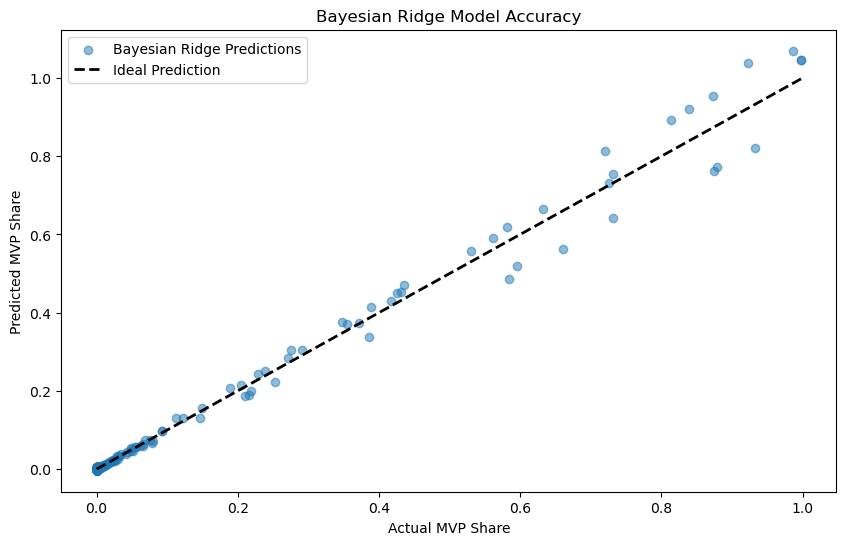

In [10]:
#Evaluation
r2_bayesian = r2_score(y_test, y_pred_bayesian)
print(f"Bayesian Ridge Model Accuracy (R-Squared)): {r2_bayesian * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bayesian, alpha=0.5, label='Bayesian Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual MVP Share')
plt.ylabel('Predicted MVP Share')
plt.title('Bayesian Ridge Model Accuracy')
plt.legend()
plt.show()

In [11]:
# Calculate correlations
correlation_matrix = df[features + ['Share']].corr()

In [12]:
# Select correlations of features with the target variable
target_correlations = correlation_matrix['Share'].drop('Share')

In [13]:
# Select correlations of features with the target variable
target_correlations = correlation_matrix['Share'].drop('Share')

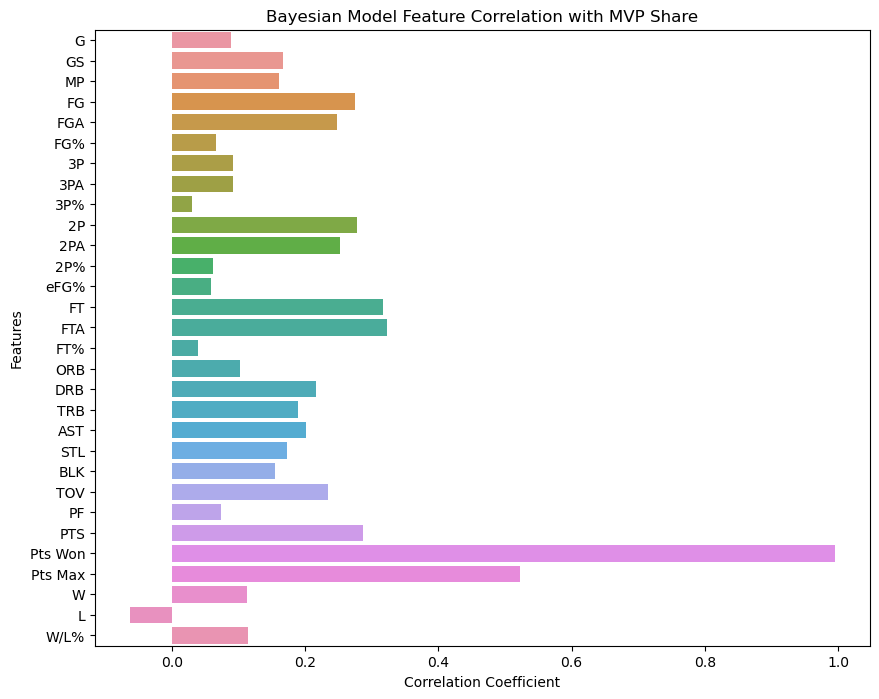

In [14]:
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlations.values, y=target_correlations.index)
plt.title('Bayesian Model Feature Correlation with MVP Share')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
#Lasso Training
lasso_model = Lasso(alpha=0.01)

In [ ]:
lasso_model.fit(X_train, y_train)

In [ ]:
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
# Retrieve the coefficients
coefficients = lasso_model.coef_

In [ ]:
# Map coefficients to features
feature_importance = dict(zip(features, coefficients))

In [ ]:
#Evaluation
print("Feature Importance in Lasso Regression:")
for feature, coef in feature_importance.items():
    print(f"{feature}: {coef}")

r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Model Accuracy (R-squared)) {r2_lasso * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='orange', label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual MVP Share')
plt.ylabel('Predicted MVP Share')
plt.title('Lasso Model Accuracy')
plt.legend()
plt.show()